### **Airline Scheduling Problem using hill climbing**

## City Allocator

This part initializes 10 cities randomly.
In the City class:
1. expected_passengers is the passengers that a company can pick up from each city.
2. fuel_cost_per_liter is the rate or cost of fuel per liter in each city.
3. x and y are the coordinates of the city on the grid

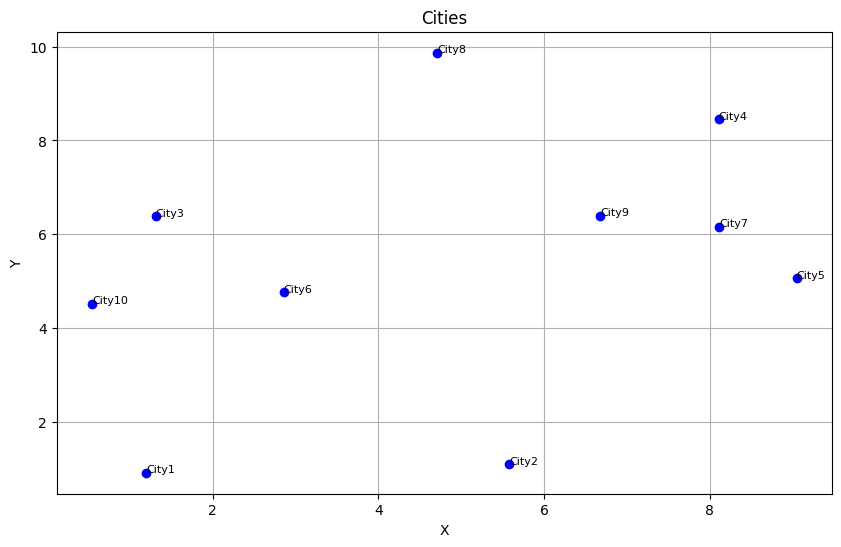

In [ ]:
import random
import matplotlib.pyplot as plt

class City:
    def __init__(self, name, expected_passengers, fuel_cost_per_liter, x, y):
        self.name = name
        self.expected_passengers = expected_passengers
        self.fuel_cost_per_liter = fuel_cost_per_liter
        self.x = x
        self.y = y

def generate_random_expected_passengers(companies):
    expected_passengers = {}
    for company in companies:
        expected_passengers[company] = random.randint(50, 300)  # Random number of passengers between 50 and 300
    return expected_passengers

# Initialize companies
companies = ["Company1", "Company2", "Company3", "Company4", "Company5"]

# Initialize cities
cities = []
for i in range(10):
    city_name = f"City{i+1}"
    expected_passengers = generate_random_expected_passengers(companies)
    fuel_cost_per_liter = random.uniform(1, 2)  # Random fuel cost per liter between $1 and $2
    x = random.uniform(0, 10)  # Random x-coordinate
    y = random.uniform(0, 10)  # Random y-coordinate
    cities.append(City(city_name, expected_passengers, fuel_cost_per_liter, x, y))

# Plot cities on a graph
plt.figure(figsize=(10, 6))
for city in cities:
    plt.scatter(city.x, city.y, color='blue')
    plt.text(city.x, city.y, city.name, fontsize=8)

plt.title('Cities')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
for city in cities:
  print(city.name,'\t',city.fuel_cost_per_liter,'\t',city.expected_passengers)

City1 	 1.6847748161324616 	 {'Company1': 274, 'Company2': 57, 'Company3': 60, 'Company4': 139, 'Company5': 245}
City2 	 1.7532694000843279 	 {'Company1': 177, 'Company2': 256, 'Company3': 256, 'Company4': 119, 'Company5': 68}
City3 	 1.0862512875276584 	 {'Company1': 140, 'Company2': 145, 'Company3': 150, 'Company4': 240, 'Company5': 283}
City4 	 1.4514616623025243 	 {'Company1': 165, 'Company2': 89, 'Company3': 245, 'Company4': 120, 'Company5': 58}
City5 	 1.1264736845529355 	 {'Company1': 217, 'Company2': 169, 'Company3': 154, 'Company4': 204, 'Company5': 99}
City6 	 1.6875273731025584 	 {'Company1': 273, 'Company2': 211, 'Company3': 182, 'Company4': 244, 'Company5': 131}
City7 	 1.965921377125845 	 {'Company1': 141, 'Company2': 202, 'Company3': 226, 'Company4': 293, 'Company5': 118}
City8 	 1.75427215249776 	 {'Company1': 155, 'Company2': 137, 'Company3': 96, 'Company4': 267, 'Company5': 295}
City9 	 1.622595415320765 	 {'Company1': 171, 'Company2': 139, 'Company3': 158, 'Company4'

## Flight Table Generator

This part initializes a table containing all possible flights in between all cities for each company.

In the Flight Class:
1. company_name is name of the company to which the flight is related.
2. origin_city is the starting point of the flight.
3. destination_city is the ending point of the flight.
4. travel_time is the flight time in hours.
5. crew_salary is hiring cost of the crew for that flight.
6. fuel_consumption is the liters of fuel consumed for that flight.

In [ ]:
import pandas as pd
from tabulate import tabulate

class Flight:
    def __init__(self, company_name, origin_city, destination_city, travel_time, crew_salary, fuel_consumption):
        self.company_name = company_name
        self.origin_city = origin_city
        self.destination_city = destination_city
        self.travel_time = travel_time
        self.crew_salary = crew_salary
        self.fuel_consumption = fuel_consumption

def generate_flights(cities, companies):
    flights = []
    for company in companies:
        for origin in cities:
            for destination in cities:
                if origin != destination:
                    travel_time = round(random.uniform(1, 5), 2)  # Random travel time between 1 and 5 hours
                    crew_salary = random.randint(200, 1000)  # Random crew salary between $200 and $1000
                    fuel_consumption = random.randint(100, 500)  # Random fuel consumption between 100 and 500 liters
                    flight = Flight(company, origin.name, destination.name, travel_time, crew_salary, fuel_consumption)
                    flights.append(flight)
    return flights

# Display flights in a table format
def display_flights_table(flights):
    table_data = []
    for flight in flights:
        row = [flight.company_name, flight.origin_city, flight.destination_city, flight.travel_time, flight.crew_salary, flight.fuel_consumption]
        table_data.append(row)
    headers = ["Company", "Origin City", "Destination City", "Travel Time (hours)", "Crew Salary ($)", "Fuel Consumption (liters)"]
    print(tabulate(table_data, headers=headers))

flights = generate_flights(cities, companies)
display_flights_table(flights)

Company    Origin City    Destination City      Travel Time (hours)    Crew Salary ($)    Fuel Consumption (liters)
---------  -------------  ------------------  ---------------------  -----------------  ---------------------------
Company1   City1          City2                                3.4                 581                          481
Company1   City1          City3                                4.54                565                          172
Company1   City1          City4                                1.16                774                          347
Company1   City1          City5                                2.42                901                          176
Company1   City1          City6                                4.23                436                          408
Company1   City1          City7                                3.3                 737                          339
Company1   City1          City8                                1.46     

In [ ]:
def calculate_total_cost(schedule, cities):
    total_fuel_cost = 0
    total_travel_time = 0
    total_crew_salary = 0

    current_city = None
    for flight in schedule:
        if current_city is None:
            current_city = flight.origin_city
        if current_city != flight.origin_city:
            return float('inf'), float('inf'), float('inf')  # Invalid schedule, returning infinite cost

        destination_city = flight.destination_city
        # Calculate fuel cost for the flight
        fuel_cost = cities[flight.origin_city].fuel_cost_per_liter * flight.fuel_consumption
        total_fuel_cost += fuel_cost
        total_travel_time += flight.travel_time
        total_crew_salary += flight.crew_salary

        current_city = destination_city

    return total_fuel_cost, total_travel_time, total_crew_salary



def hill_climbing(cities, flights):
    best_schedules = {}
    for company_name in set(flight.company_name for flight in flights):
        current_schedule = generate_initial_schedule(company_name, flights, cities)  # Pass cities parameter
        best_schedule = current_schedule
        best_cost = calculate_total_cost(best_schedule, cities)

        for _ in range(1000):  # Limiting iterations to avoid infinite loops
            neighbors = generate_neighbors(current_schedule)
            for neighbor in neighbors:
                neighbor_cost = calculate_total_cost(neighbor, cities)
                if neighbor_cost < best_cost:
                    best_schedule = neighbor
                    best_cost = neighbor_cost
            current_schedule = best_schedule

        best_schedules[company_name] = best_schedule

    return best_schedules

def generate_initial_schedule(company_name, flights, cities):
    company_flights = [flight for flight in flights if flight.company_name == company_name]
    cities_copy = list(cities.keys())  # Get list of city names
    random.shuffle(cities_copy)  # Shuffle the list of cities
    starting_city = None
    for city_name in cities_copy:
        if city_name == 'City1':  # Assuming 'City1' is the starting city (e.g., city A)
            starting_city = city_name
            break
    cities_copy.remove(starting_city)  # Remove the starting city from the list
    random.shuffle(cities_copy)  # Shuffle the remaining cities
    schedule = [Flight(company_name, starting_city, starting_city, 0, 0, 0)]  # Start with the starting city
    for city_name in cities_copy:
        travel_time = round(random.uniform(1, 5), 2)  # Random travel time between 1 and 5 hours
        crew_salary = random.randint(200, 1000)  # Random crew salary between $200 and $1000
        fuel_consumption = random.randint(100, 500)  # Random fuel consumption between 100 and 500 liters
        schedule.append(Flight(company_name, schedule[-1].destination_city, city_name, travel_time, crew_salary, fuel_consumption))  # Add flights to other cities
    travel_time = round(random.uniform(1, 5), 2)  # Random travel time between 1 and 5 hours for return journey
    crew_salary = random.randint(200, 1000)  # Random crew salary between $200 and $1000 for return journey
    fuel_consumption = random.randint(100, 500)  # Random fuel consumption between 100 and 500 liters for return journey
    schedule.append(Flight(company_name, schedule[-1].destination_city, starting_city, travel_time, crew_salary, fuel_consumption))  # Return to the starting city
    return schedule





def generate_neighbors(schedule):
    neighbors = []
    for i in range(len(schedule)):
        for j in range(i + 1, len(schedule)):
            neighbor_schedule = schedule[:]
            neighbor_schedule[i], neighbor_schedule[j] = neighbor_schedule[j], neighbor_schedule[i]
            neighbors.append(neighbor_schedule)
    return neighbors


# Apply hill climbing to find optimal schedules for each company
best_schedules = hill_climbing({city.name: city for city in cities}, flights)


In [ ]:
def display_company_flights(data):
    for company, flights in data.items():
        print("\n" + company + "\n---------")
        if flights:
            display_flights_table(flights)
            print("---------\n")
        else:
            print("No flights available for this company")

display_company_flights(best_schedules)


Company4
---------
Company    Origin City    Destination City      Travel Time (hours)    Crew Salary ($)    Fuel Consumption (liters)
---------  -------------  ------------------  ---------------------  -----------------  ---------------------------
Company4   City1          City1                                0                     0                            0
Company4   City1          City8                                3.07                707                          139
Company4   City8          City3                                4.47                894                          148
Company4   City3          City9                                1.57                469                          416
Company4   City9          City10                               2.55                720                          218
Company4   City10         City7                                3.98                673                          259
Company4   City7          City6                     

<ipython-input-23-2e372198a007>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', len(flights) + 1)


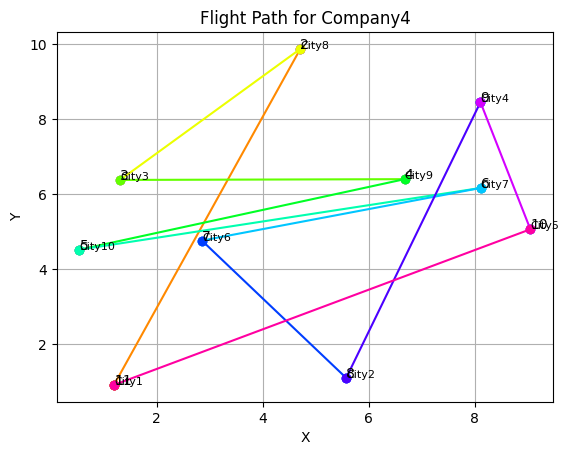

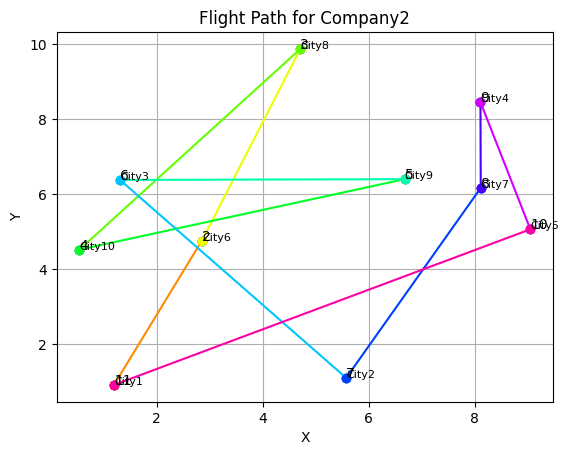

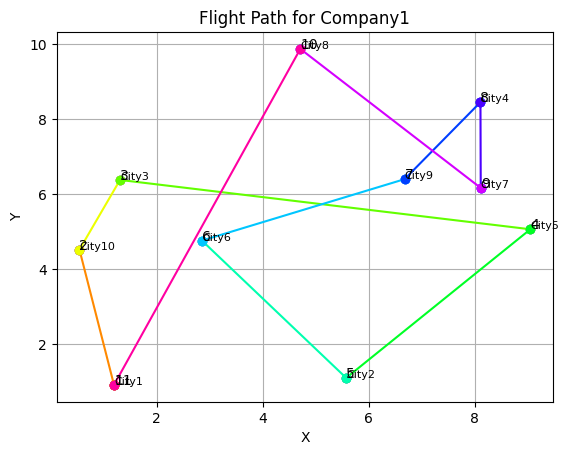

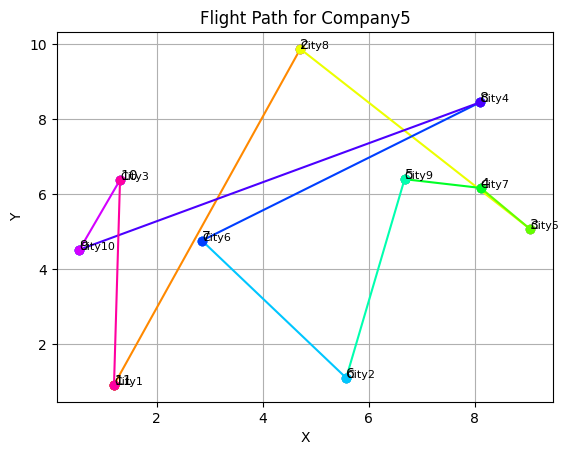

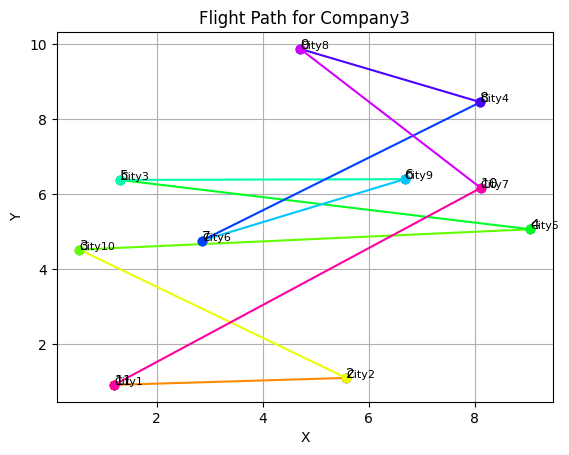

In [ ]:
def plot_flight_path(company, flights, cities):
    city_coordinates = {city.name: (city.x, city.y) for city in cities}
    color_map = plt.cm.get_cmap('hsv', len(flights) + 1)

    for city_name, (x, y) in city_coordinates.items():
        plt.plot(x, y, 'bo')
        plt.text(x, y, city_name, fontsize=8)

    for i, flight in enumerate(flights):
        origin_coords = city_coordinates[flight.origin_city]
        dest_coords = city_coordinates[flight.destination_city]
        plt.plot([origin_coords[0], dest_coords[0]], [origin_coords[1], dest_coords[1]], color=color_map(i), linestyle='-', marker='o')
        plt.text(dest_coords[0], dest_coords[1], str(i+1))

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Flight Path for {company}')
    plt.grid(True)
    plt.show()


# Plot flight paths for each company
for company, schedule in best_schedules.items():
    plot_flight_path(company, schedule, cities)

